<div class='alert alert-info alert-block' align='center'><h1><b></b>Market Basket Analysis</h1></div>


<div class='alert alert-info alert-block' align='center'><h3><b></b>Problem Statement</h3></div>



Wallkart is a supermarket chain across South America and has multiple stores present in different regions. For each of their stores , they want to optimise the placement of the items  to increase the visibility and therefore the overall sales. 

You are provided with the sales dataset from one of the Wallkart store. The dataset contains transactions including customer id and date of purchase. Use market basket analysis to find out the most frequent items bought together and which items should be placed together to increase sales. Also provide insights around the transaction data such as most frequently bought item , day wise preference of customers.

### Data Description
1. **Customer ID :** Unique Customer ID
2. **Date :** Date of purchase
3. **Item :** Item bought by customer

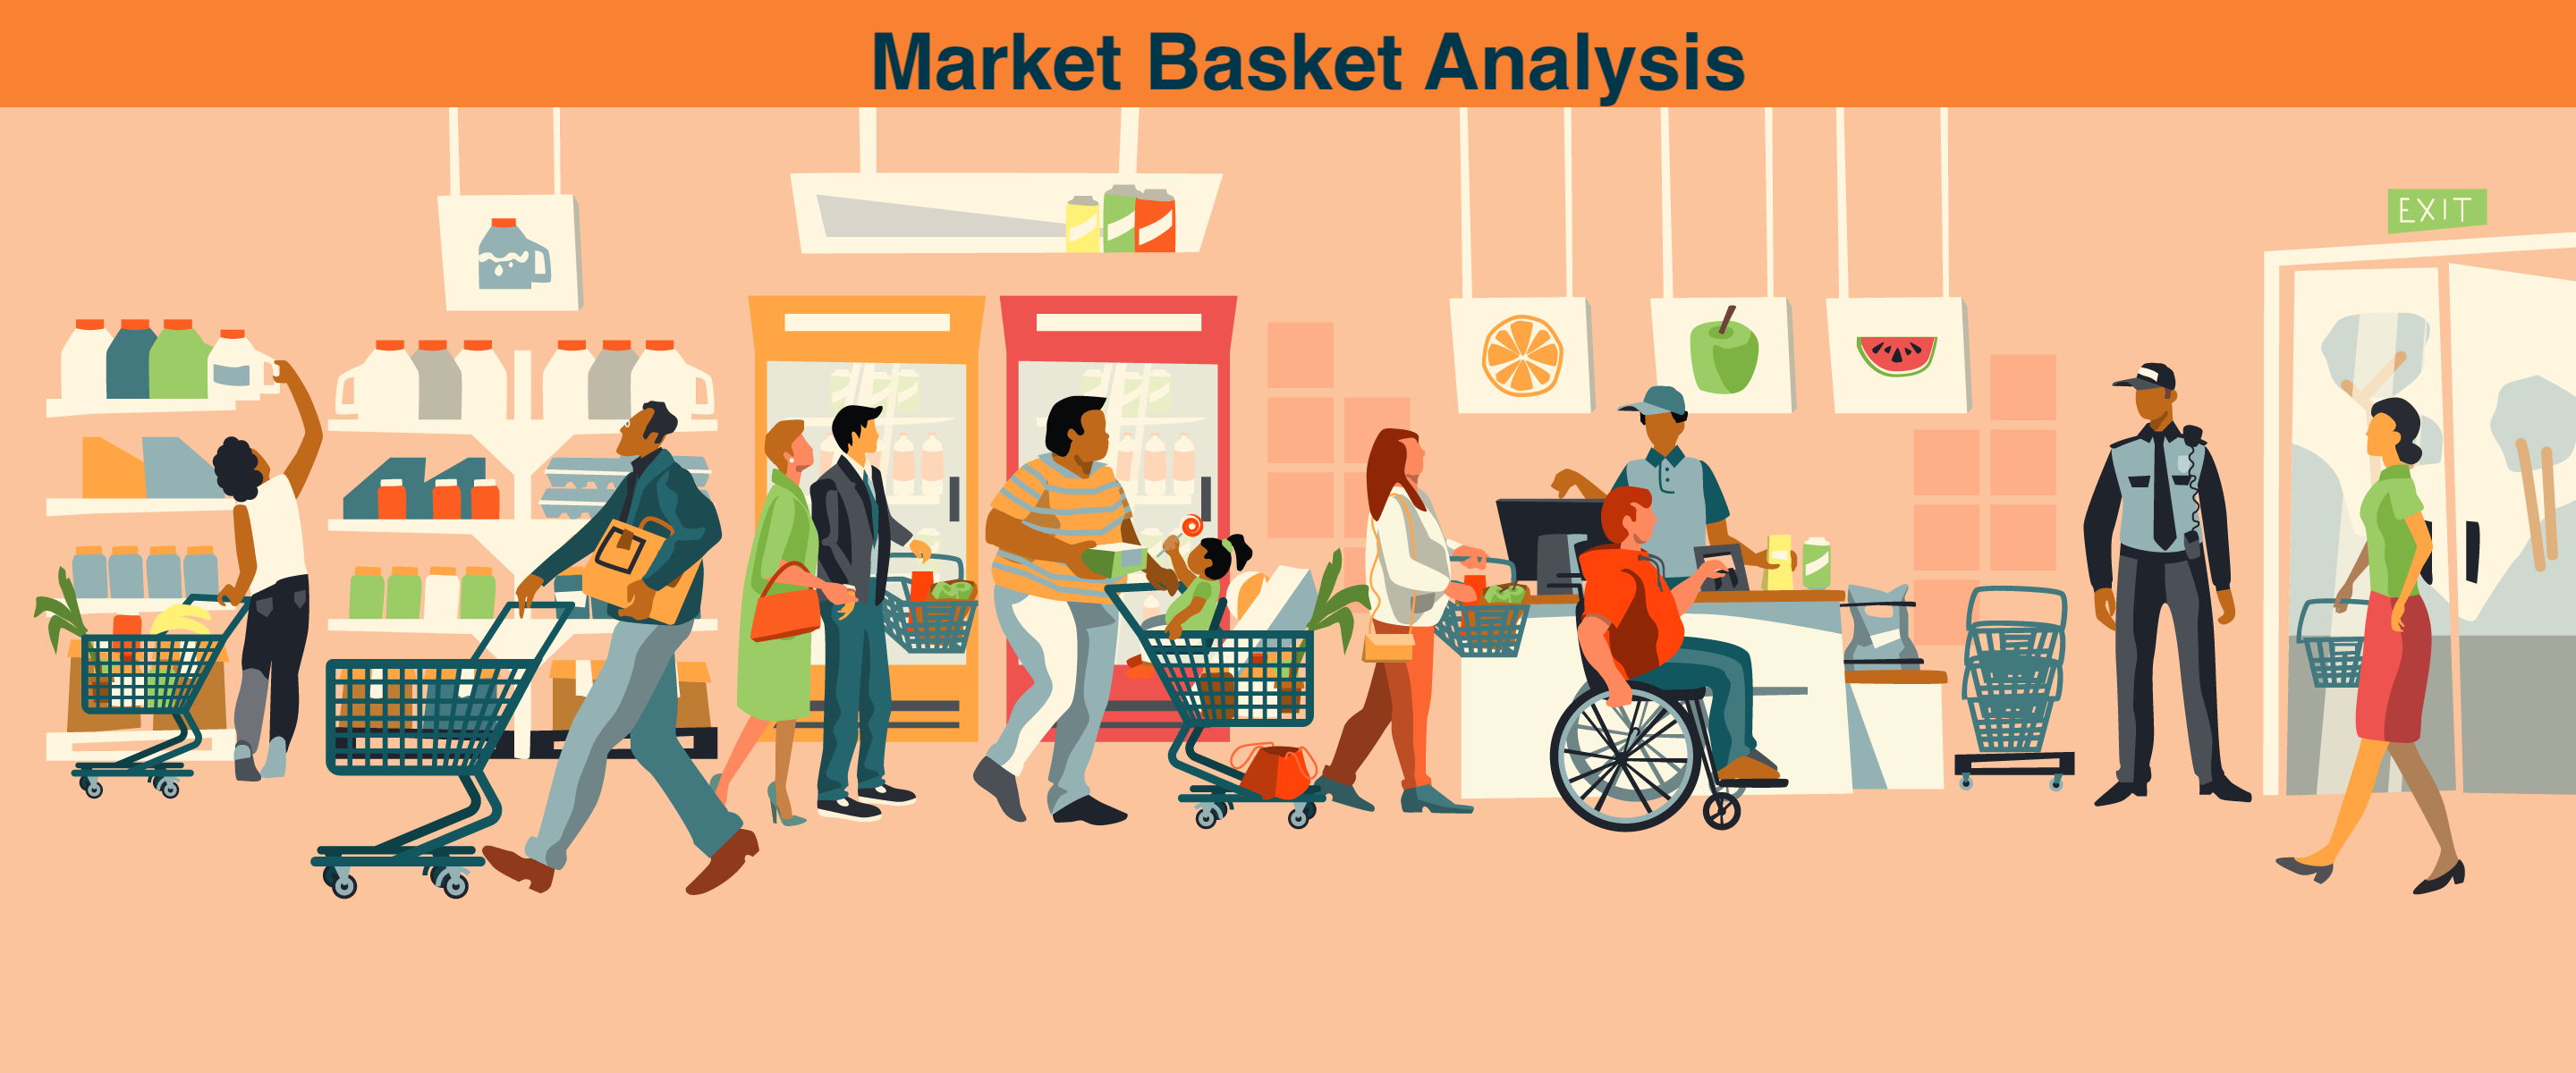

In [231]:
Image(r'C:\Users\shubh\Desktop\python\upgrad\Images\MB.png',width=1200,height=400)

In [220]:
# imporing libraries
import pandas as pd
import numpy as np
# importing viusalization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
from IPython.display import Image

# importing libraries for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

<div class='alert alert-info alert-block' align='center'><h4><b></b>Data Understanding</h4></div>


In [165]:
# loading the dataset

df = pd.read_csv(r"dataset.csv")
# fetching top 5 rows from dataset
df.head()

,Customer ID,Date,Item
0,1808,21/07/15,tropical fruit
1,2552,05/01/15,whole milk
2,2300,19/09/15,pip fruit
3,1187,12/12/15,other vegetables
4,3037,01/02/15,whole milk


In [166]:
# rows and columns in dataset
df.shape

(38765, 3)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  38765 non-null  int64 
 1   Date         38765 non-null  object
 2   Item         38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [168]:
# changing the datatype of date column to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [169]:
# adding day of week column
df['Day of week'] = df['Date'].dt.dayofweek

In [170]:
# adding weekday column
df['Weekday'] = df['Date'].dt.strftime('%a')

In [171]:
# top 5 rows of dataset
df.head()

,Customer ID,Date,Item,Day of week,Weekday
0,1808,2015-07-21,tropical fruit,1,Tue
1,2552,2015-05-01,whole milk,4,Fri
2,2300,2015-09-19,pip fruit,5,Sat
3,1187,2015-12-12,other vegetables,5,Sat
4,3037,2015-01-02,whole milk,4,Fri


<div id='EDA' class='alert alert-info alert-block' align='center'><h4><b></b>Exploratory Data Analysis</h4></div>


In [173]:
# getting unique records from Item column
print('Uniques values in Item :',df['Item'].nunique())
print('\nUnique Values are :\n',df['Item'].unique())

Uniques values in Item : 167

Unique Values are :
 ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' '

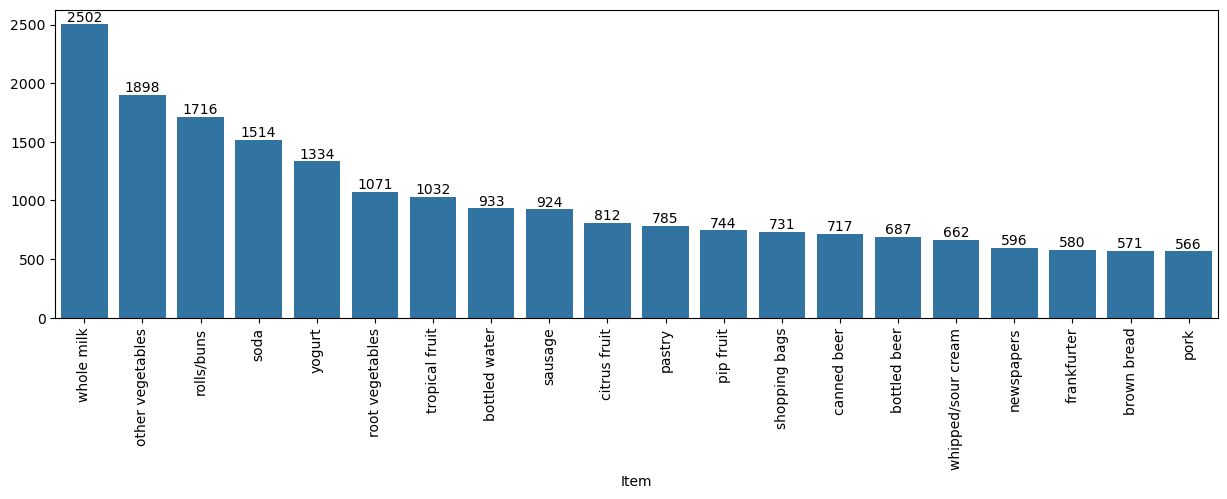

In [174]:
# viusal to know the most selling items
value_count = df['Item'].value_counts()[:20]
plt.figure(figsize=(15,4))
ax = sns.barplot(x = value_count.keys() , y = value_count.values )
for p in ax.patches:
    plt.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f'{p.get_height() :.0f}',
        ha='center',
        va='bottom'
    )
plt.xticks(rotation=90)
plt.show()

##### Top 3 Selling item are Whole Milk , vegetables , rolls/buns in Wallkart store

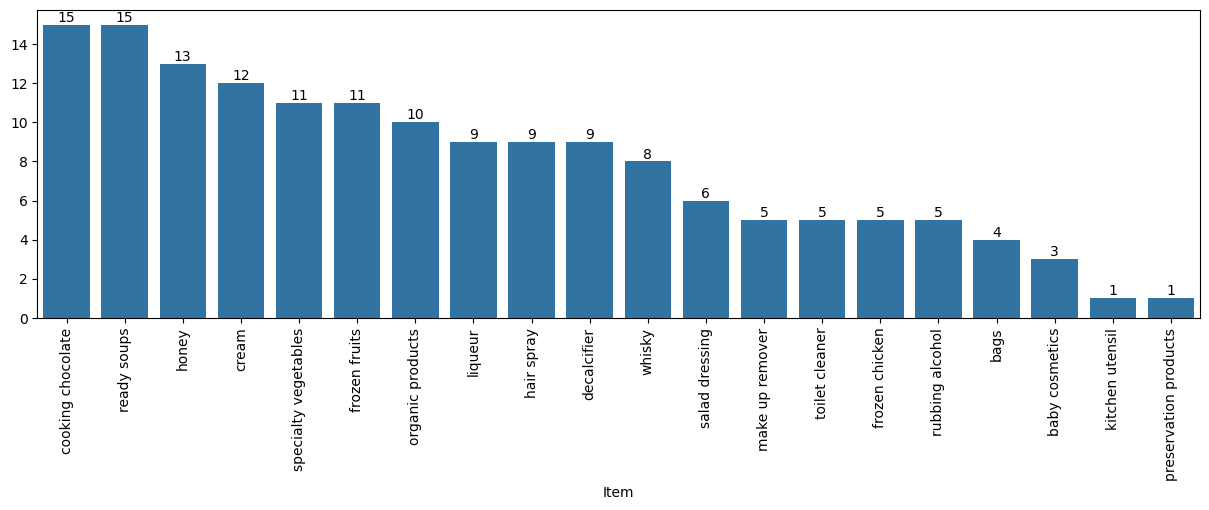

In [176]:
# viusal to know the least selling items

value_count = df['Item'].value_counts()[-20:]
plt.figure(figsize=(15,4))
ax = sns.barplot(x = value_count.keys() , y = value_count.values )
for p in ax.patches:
    plt.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f'{p.get_height() :.0f}',
        ha='center',
        va='bottom'
    )
plt.xticks(rotation=90)
plt.show()

##### The chart above shows the least sold items in Walmart stores.

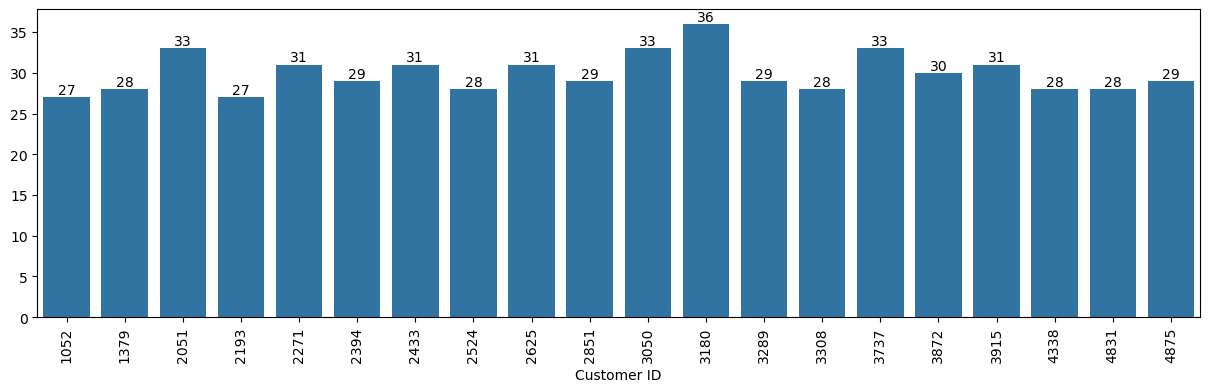

In [178]:
# viusal to know the most valuable customers
value_count = df['Customer ID'].value_counts()[:20]
plt.figure(figsize=(15,4))
ax = sns.barplot(x = value_count.keys() , y = value_count.values )
for p in ax.patches:
    plt.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f'{p.get_height() :.0f}',
        ha='center',
        va='bottom'
    )
plt.xticks(rotation=90)
plt.show()

##### Above chart show the most 20 valuable customers of Wallkart store

In [181]:
df.groupby('Weekday')['Item'].count()

Weekday
Fri    5504
Mon    5299
Sat    5397
Sun    5624
Thu    5754
Tue    5524
Wed    5663
Name: Item, dtype: int64

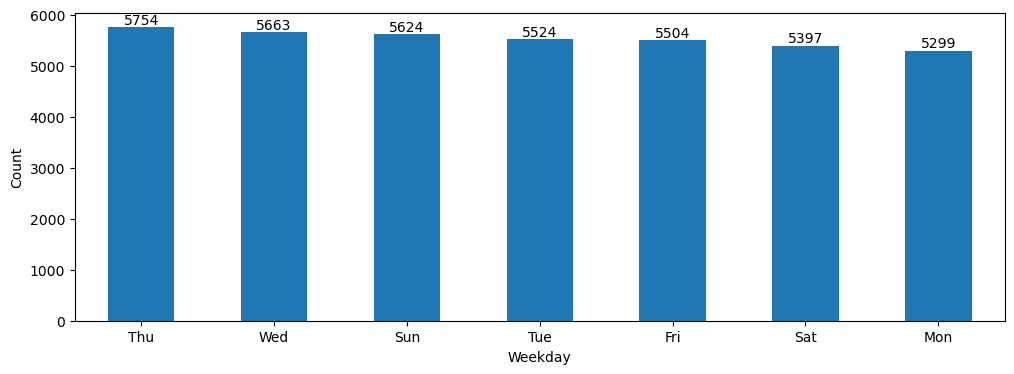

In [182]:
plt.figure(figsize=(12,4))
ax = (df['Weekday'].value_counts()).plot(kind='bar')
for p in ax.patches:
    plt.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f'{p.get_height() :.0f}',
        ha='center',
        va='bottom'
    )
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

##### There isn't much difference in the quantity sold on weekdays.  

<div class='alert alert-info alert-block' align='center'><h4><b></b>Data Preparation</h4></div>


In [185]:
#create the unique invoice id combining customer id and date
df['Invoice_no'] = df['Customer ID'].astype('str') +' '+df['Date'].astype('str')
df.head()

,Customer ID,Date,Item,Day of week,Weekday,Invoice_no
0,1808,2015-07-21,tropical fruit,1,Tue,1808 2015-07-21
1,2552,2015-05-01,whole milk,4,Fri,2552 2015-05-01
2,2300,2015-09-19,pip fruit,5,Sat,2300 2015-09-19
3,1187,2015-12-12,other vegetables,5,Sat,1187 2015-12-12
4,3037,2015-01-02,whole milk,4,Fri,3037 2015-01-02


In [187]:
#convert the transaction data into crosstab form for market basket analysis 
useritem_df = pd.crosstab(df['Invoice_no'], df['Item'])
useritem_df.head(2)

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Invoice_no,,,,,,,,,,,,,,,,,,,,,
1000 2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000 2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [188]:
# shape of useritem_df
useritem_df.shape

(14963, 167)

In [189]:
#create and apply a function on user item dataset that returns ~max(0,1)
def min_max_fix(quantity):
    val = 0
    if quantity > 0:
        val = 1
    return val

basket_input = useritem_df.applymap(min_max_fix)

<div id='rule' class='alert alert-info alert-block' align='center'><h4><b></b>Frequent Itemsets and Rules</h4></div>


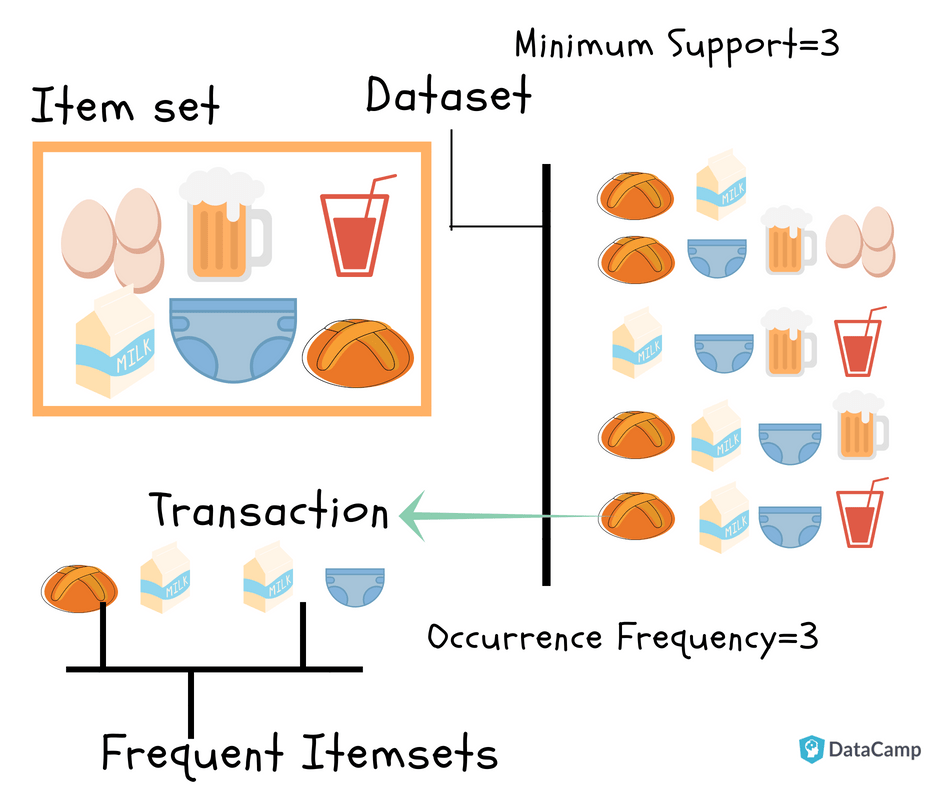

In [241]:
Image(r'C:\Users\shubh\Desktop\python\upgrad\Images\R.png',width=1200)

In [191]:
#Use apriori for running market basket analysis to generate rules and frequent item set
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

In [192]:
# use the association rules 
rules = association_rules(frequent_itemsets, metric="lift",num_itemsets=15)


In [193]:
#sort the rules 
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(15)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,1.0,-0.002166,0.975219,-0.198448,0.046252,-0.025410,0.089579
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,1.0,-0.002166,0.980729,-0.202951,0.046252,-0.019649,0.089579
648,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,1.0,-0.000575,0.988811,-0.063965,0.042784,-0.011316,0.102551
649,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,1.0,-0.000575,0.996140,-0.070851,0.042784,-0.003875,0.102551
624,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,1.0,-0.001628,0.979147,-0.185487,0.041578,-0.021297,0.081066
625,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,1.0,-0.001628,0.984071,-0.189562,0.041578,-0.016187,0.081066


<div class='alert alert-info alert-block' align='center'><h4><b></b>Conclusion</h4></div>


The above report shows the frequently-bought-together items.Here, the “antecedents” and “consequents” columns show items that are frequently purchased together.For example, the first row of the dataset tells us that if a person were to buy rolls/buns, then they are also likely to purchase whole milk.

The resulting table shows that the four most popular product combinations that are frequently bought together are:

1. rolls/buns and whole milk
2. yogurt and whole milk
3. soda and other vegetables
4. sausages and whole milk